In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import chisquare
from scipy.stats import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Data Wrangling

In [8]:
Insurance_fraud = '/Users/jenniferrobbins/Downloads/InsuranceFraud.xlsx'
df = pd.read_excel(Insurance_fraud)
pd.set_option('display.max_columns', 100)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [95]:
df.shape

(11565, 34)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [97]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     5
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            6
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [98]:
df['Age'].fillna(df['Age'].mode()[0],inplace = True)
df['DriverRating'].fillna(df['DriverRating'].mode()[0],inplace = True)

In [99]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
ClaimSize               0
dtype: int64

In [111]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,11565.0,2.784003,1.284854,1.0,2.000000,3.000000,4.000000,5.000000
WeekOfMonthClaimed,11565.0,2.701167,1.258153,1.0,2.000000,3.000000,4.000000,5.000000
Age,11565.0,39.896585,13.588375,0.0,31.000000,38.000000,49.000000,80.000000
FraudFound_P,11565.0,0.059230,0.236066,0.0,0.000000,0.000000,0.000000,1.000000
PolicyNumber,11565.0,7710.474449,4453.762219,1.0,3851.000000,7712.000000,11542.000000,15420.000000
RepNumber,11565.0,8.469780,4.618952,1.0,4.000000,8.000000,12.000000,16.000000
Deductible,11565.0,407.617812,43.397393,300.0,400.000000,400.000000,400.000000,700.000000
DriverRating,11565.0,2.492693,1.118329,1.0,1.000000,2.000000,3.000000,4.000000
Year,11565.0,1994.865975,0.801798,1994.0,1994.000000,1995.000000,1996.000000,1996.000000
ClaimSize,11565.0,22955.978035,26988.811719,0.0,4148.845001,8130.994563,46299.646944,141394.159289


### Observations
#### - All features except for ClaimSize have a mean almost equal to the median, suggesting the data is normally distributed.
#### - ClaimSize has a median value almost three times smaller than the mean. This suggests a is positively skewed distribution.

#### 


### Below shows a summary the non-numeric features 

In [101]:
df.select_dtypes(include='object').describe().transpose()

,count,unique,top,freq
Month,11565,12,Jan,1056
DayOfWeek,11565,7,Monday,2000
Make,11565,19,Pontiac,2899
AccidentArea,11565,2,Urban,10356
DayOfWeekClaimed,11565,8,Monday,2811
MonthClaimed,11565,13,Jan,1084
Sex,11565,2,Male,9768
MaritalStatus,11565,4,Married,7986
Fault,11565,2,Policy Holder,8394
PolicyType,11565,9,Sedan - Collision,4186


# Exploratory Data Analysis

### Distributions on each of the numeric features in the data set 

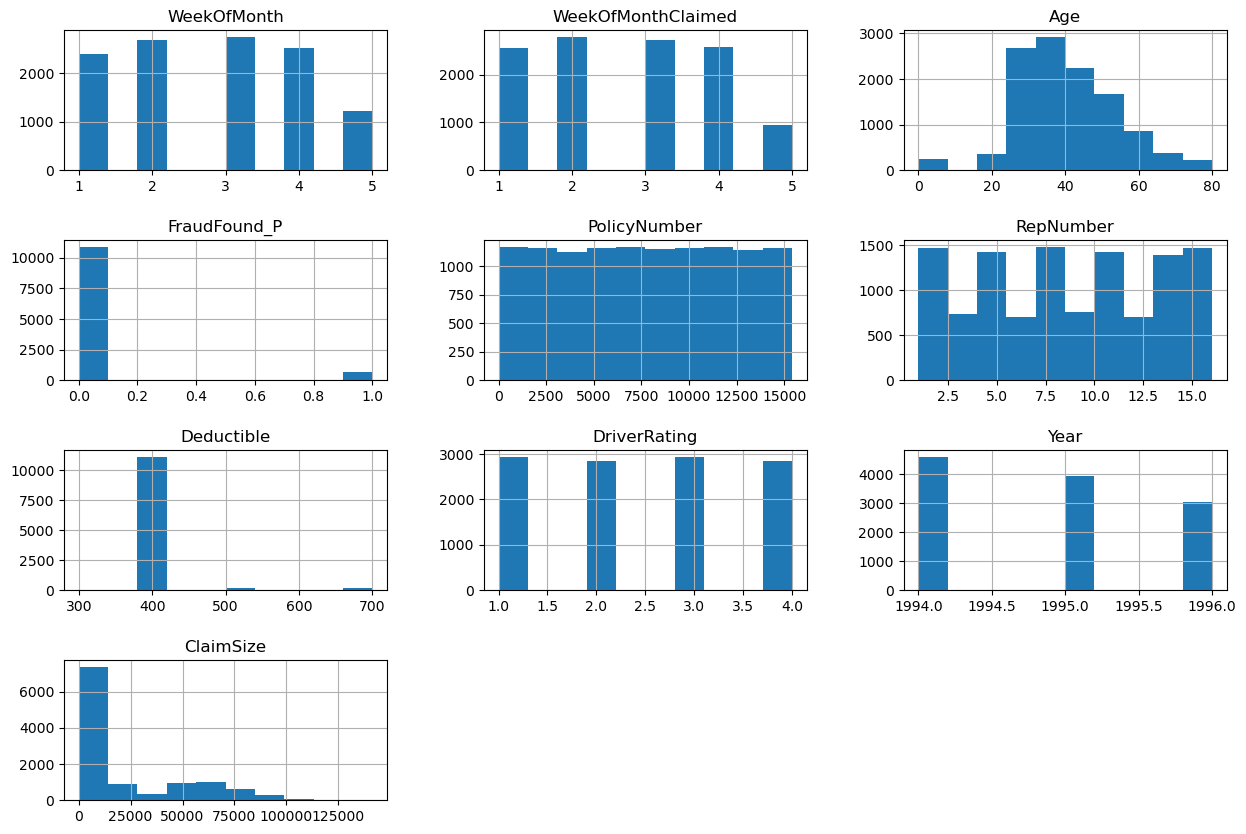

In [102]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

#### I decided to take a closer look at fraud and no fraud claims with the Age and ClaimSize features, since they resulted in interesting distribtions.

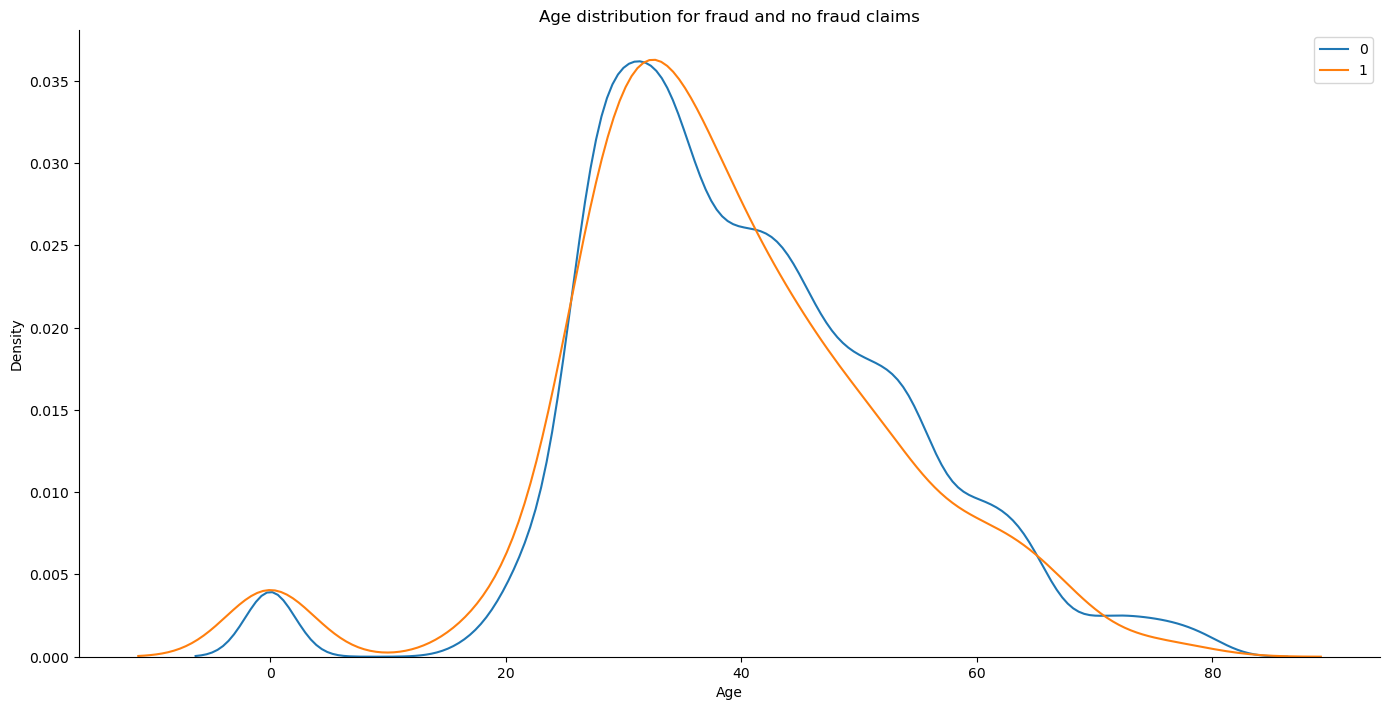

In [103]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'Age')
plt.title('Age distribution for fraud and no fraud claims')
plt.legend()
plt.show()

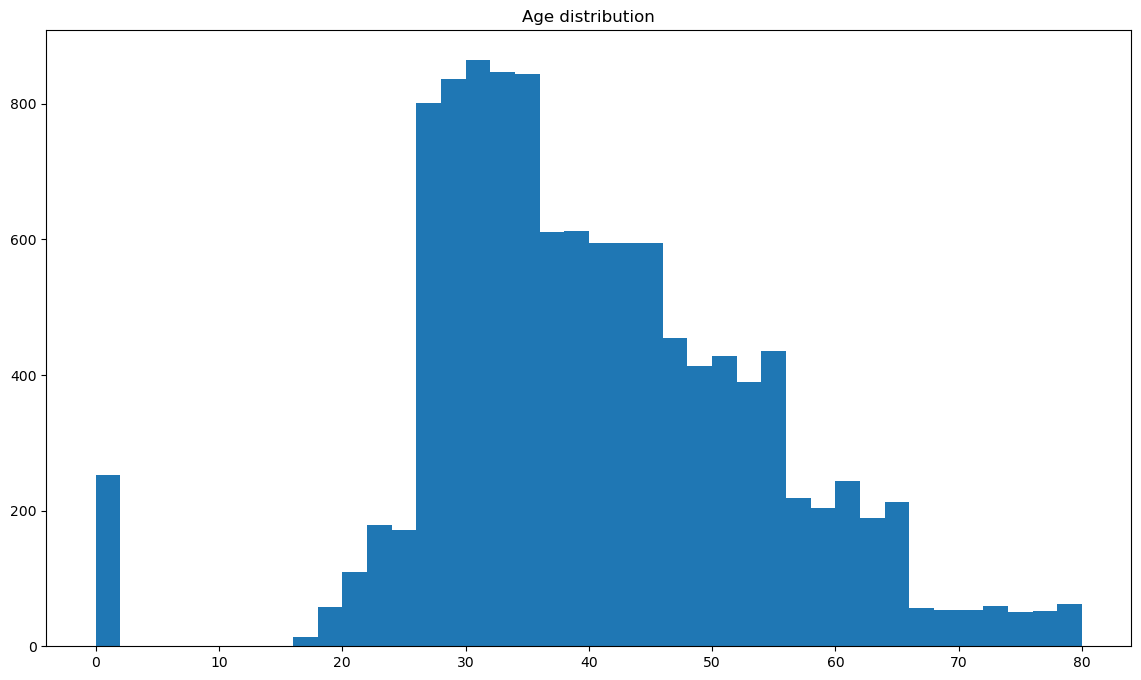

In [9]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['Age'], bins = 40)    #, bins = 'fd')
plt.title('Age distribution')
plt.show()

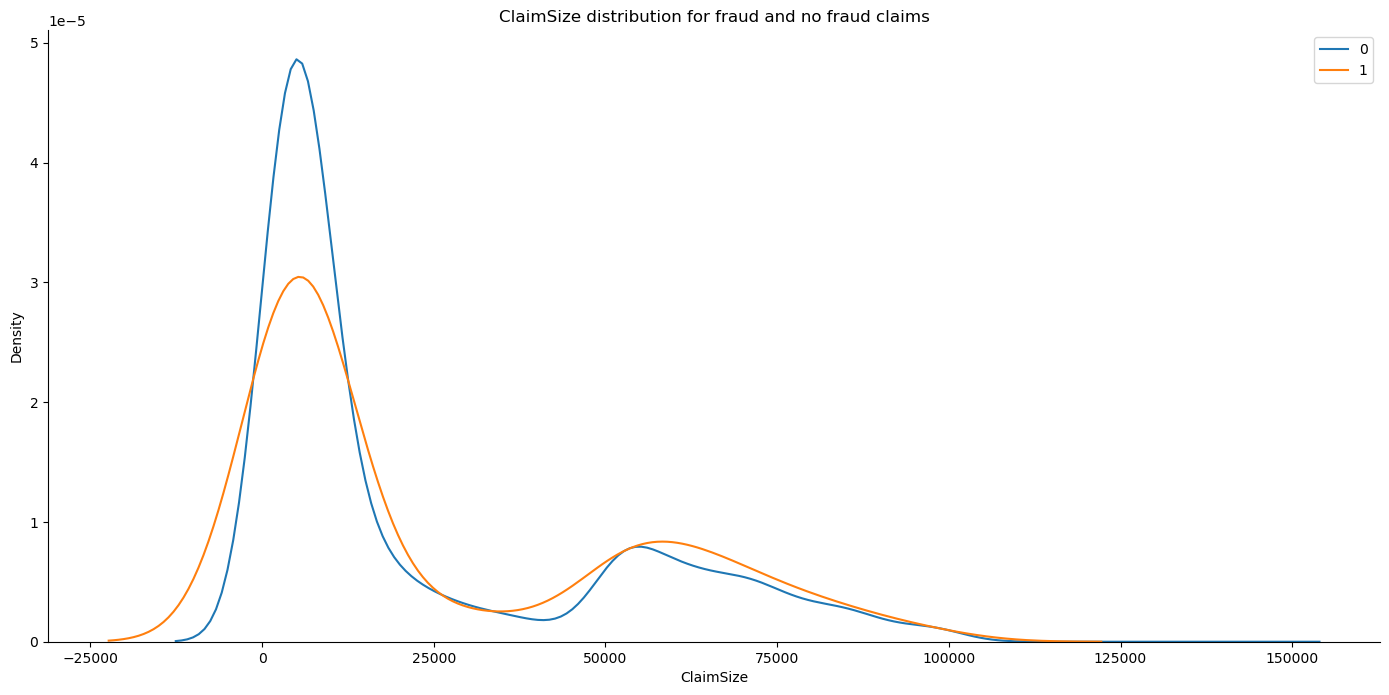

In [104]:
g = sns.FacetGrid(df, hue='FraudFound_P', height = 7, aspect = 2)
g.map(sns.kdeplot, 'ClaimSize')
plt.title('ClaimSize distribution for fraud and no fraud claims')
plt.legend()
plt.show()

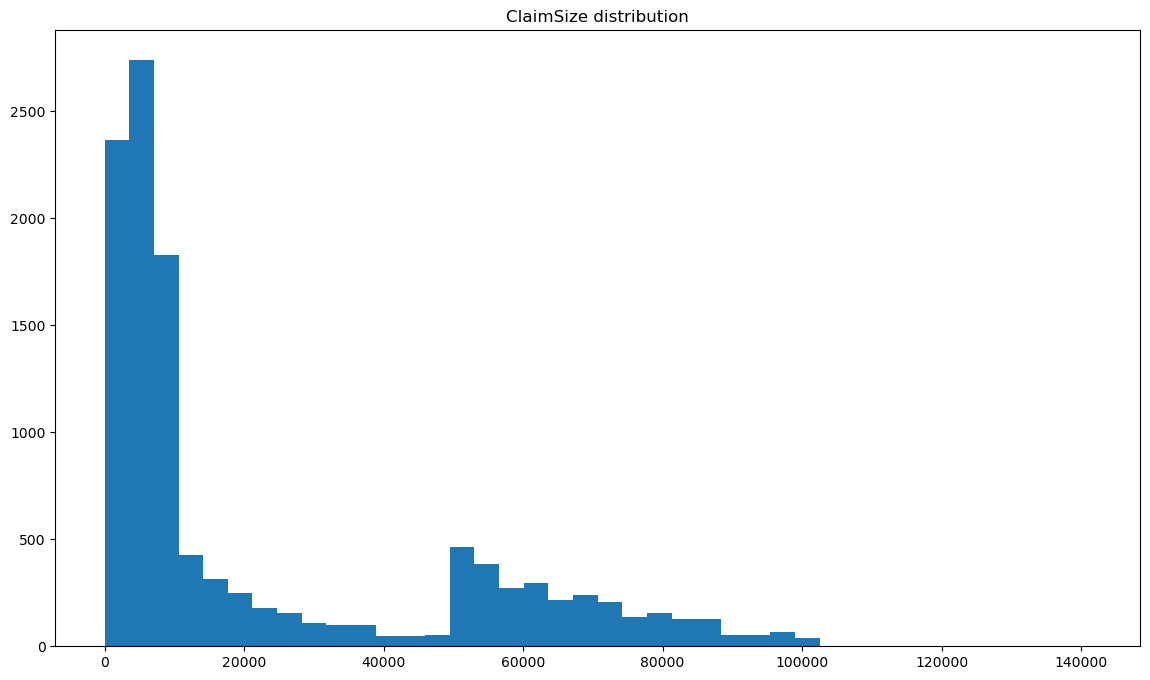

In [105]:
plt.figure(figsize = (14, 8))
plt.hist(x = df['ClaimSize'], bins = 40)    
plt.title('ClaimSize distribution')
plt.show()

### Below are tables of fraud rates for each non-numeric feature

In [106]:
fraud_rate_make = df.groupby('Make').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_make.columns = ['FraudRate', '#']
fraud_rate_make = fraud_rate_make.apply(lambda x: round(x, 3))
fraud_rate_make.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Make,,
Mecedes,0.333,3
Accura,0.127,354
Saturn,0.098,41
Saab,0.086,70
Ford,0.074,338
Honda,0.062,2159
Toyota,0.061,2317
Chevrolet,0.060,1253
Mercury,0.059,68


In [115]:
fraud_rate_area = df.groupby('AccidentArea').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_area.columns = ['FraudRate', '#']
fraud_rate_area = fraud_rate_area.apply(lambda x: round(x, 3))
fraud_rate_area.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AccidentArea,,
Rural,0.081,1209
Urban,0.057,10356


In [116]:
fraud_rate_gender = df.groupby('Sex').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_gender.columns = ['FraudRate', '#']
fraud_rate_gender = fraud_rate_gender.apply(lambda x: round(x, 3))
fraud_rate_gender.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Sex,,
Male,0.063,9768
Female,0.041,1797


In [117]:
fraud_rate_status = df.groupby('MaritalStatus').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_status.columns = ['FraudRate', '#']
fraud_rate_status = fraud_rate_status.apply(lambda x: round(x, 3))
fraud_rate_status.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
MaritalStatus,,
Widow,0.095,21
Married,0.060,7986
Single,0.057,3497
Divorced,0.049,61


In [107]:
fraud_rate_policy = df.groupby('PolicyType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_policy.columns = ['FraudRate', '#']
fraud_rate_policy = fraud_rate_policy.apply(lambda x: round(x, 3))
fraud_rate_policy.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PolicyType,,
Utility - All Perils,0.131,251
Sport - Collision,0.130,262
Utility - Collision,0.125,24
Sedan - All Perils,0.100,3067
Sedan - Collision,0.067,4186
Sedan - Liability,0.007,3742
Sport - All Perils,0.000,19
Sport - Liability,0.000,1
Utility - Liability,0.000,13


In [121]:
fraud_rate_fault = df.groupby('Fault').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_fault.columns = ['FraudRate', '#']
fraud_rate_fault = fraud_rate_fault.apply(lambda x: round(x, 3))
fraud_rate_fault.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
Fault,,
Policy Holder,0.078,8394
Third Party,0.009,3171


In [122]:
fraud_rate_cat = df.groupby('VehicleCategory').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_cat.columns = ['FraudRate', '#']
fraud_rate_cat = fraud_rate_cat.apply(lambda x: round(x, 3))
fraud_rate_cat.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
VehicleCategory,,
Utility,0.125,288
Sedan,0.081,7253
Sport,0.015,4024


In [123]:
fraud_rate_price = df.groupby('VehiclePrice').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_price.columns = ['FraudRate', '#']
fraud_rate_price = fraud_rate_price.apply(lambda x: round(x, 3))
fraud_rate_price.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
VehiclePrice,,
more than 69000,0.088,1605
less than 20000,0.082,800
40000 to 59000,0.060,349
20000 to 29000,0.054,6112
60000 to 69000,0.051,59
30000 to 39000,0.047,2640


In [124]:
fraud_rate_pastclaims = df.groupby('PastNumberOfClaims').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_pastclaims.columns = ['FraudRate', '#']
fraud_rate_pastclaims = fraud_rate_pastclaims.apply(lambda x: round(x, 3))
fraud_rate_pastclaims.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
PastNumberOfClaims,,
none,0.079,3286
1,0.062,2675
2 to 4,0.050,4140
more than 4,0.036,1464


In [130]:
fraud_rate_carage = df.groupby('AgeOfVehicle').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_carage.columns = ['FraudRate', '#']
fraud_rate_carage = fraud_rate_carage.apply(lambda x: round(x, 3))
fraud_rate_carage.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AgeOfVehicle,,
new,0.091,285
3 years,0.090,100
4 years,0.085,176
6 years,0.064,2581
5 years,0.061,990
7 years,0.059,4388
more than 7,0.049,2993
2 years,0.038,52


In [108]:
fraud_rate_rep_wit = df.groupby(['PoliceReportFiled', 'WitnessPresent']).agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_rep_wit.columns = ['FraudRate', '#']
fraud_rate_rep_wit = fraud_rate_rep_wit.apply(lambda x: round(x, 3))
fraud_rate_rep_wit.sort_values(by='FraudRate',ascending=False)

FraudRate      #
PoliceReportFiled WitnessPresent                  
No                No                  0.060  11193
                  Yes                 0.048     42
Yes               No                  0.043    304
                  Yes                 0.000     26

In [131]:
fraud_rate_agent = df.groupby('AgentType').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_agent.columns = ['FraudRate', '#']
fraud_rate_agent = fraud_rate_agent.apply(lambda x: round(x, 3))
fraud_rate_agent.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
AgentType,,
External,0.060,11394
Internal,0.023,171


In [132]:
fraud_rate_cars = df.groupby('NumberOfCars').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_cars.columns = ['FraudRate', '#']
fraud_rate_cars = fraud_rate_cars.apply(lambda x: round(x, 3))
fraud_rate_cars.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
NumberOfCars,,
2 vehicles,0.066,559
3 to 4,0.066,288
1 vehicle,0.059,10698
5 to 8,0.053,19
more than 8,0.000,1


In [133]:
fraud_rate_bpolicy = df.groupby('BasePolicy').agg({
    "FraudFound_P": "mean", 
    "PolicyNumber": 'count'
})
fraud_rate_bpolicy.columns = ['FraudRate', '#']
fraud_rate_bpolicy = fraud_rate_bpolicy.apply(lambda x: round(x, 3))
fraud_rate_bpolicy.sort_values(by='FraudRate',ascending=False)

,FraudRate,#
BasePolicy,,
All Perils,0.102,3337
Collision,0.071,4472
Liability,0.007,3756


#### Outlier Analysis

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'WeekOfMonth'),
  Text(2, 0, 'WeekOfMonthClaimed'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'FraudFound_P'),
  Text(5, 0, 'PolicyNumber'),
  Text(6, 0, 'RepNumber'),
  Text(7, 0, 'Deductible'),
  Text(8, 0, 'DriverRating'),
  Text(9, 0, 'Year'),
  Text(10, 0, 'ClaimSize')])

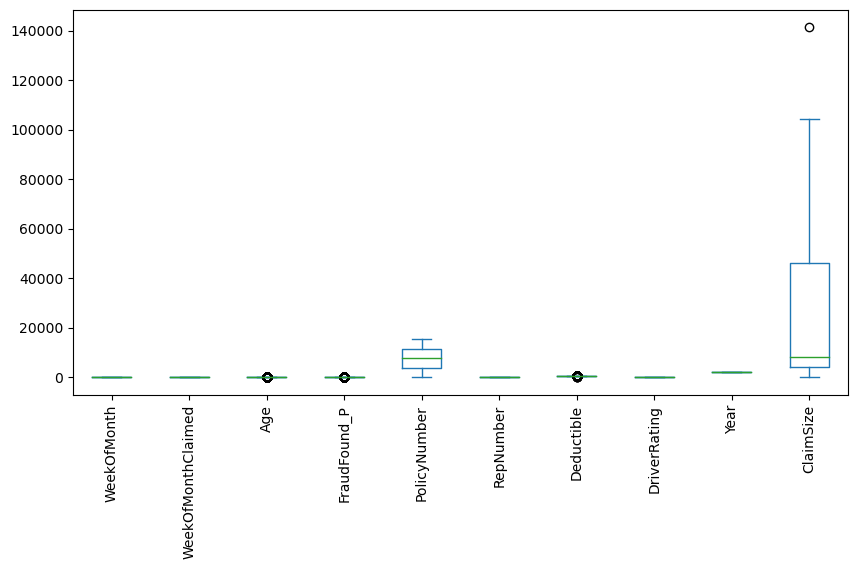

In [31]:
df.plot.box(figsize = (10,5), showfliers=True)
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Correlation matrix for numerical features')

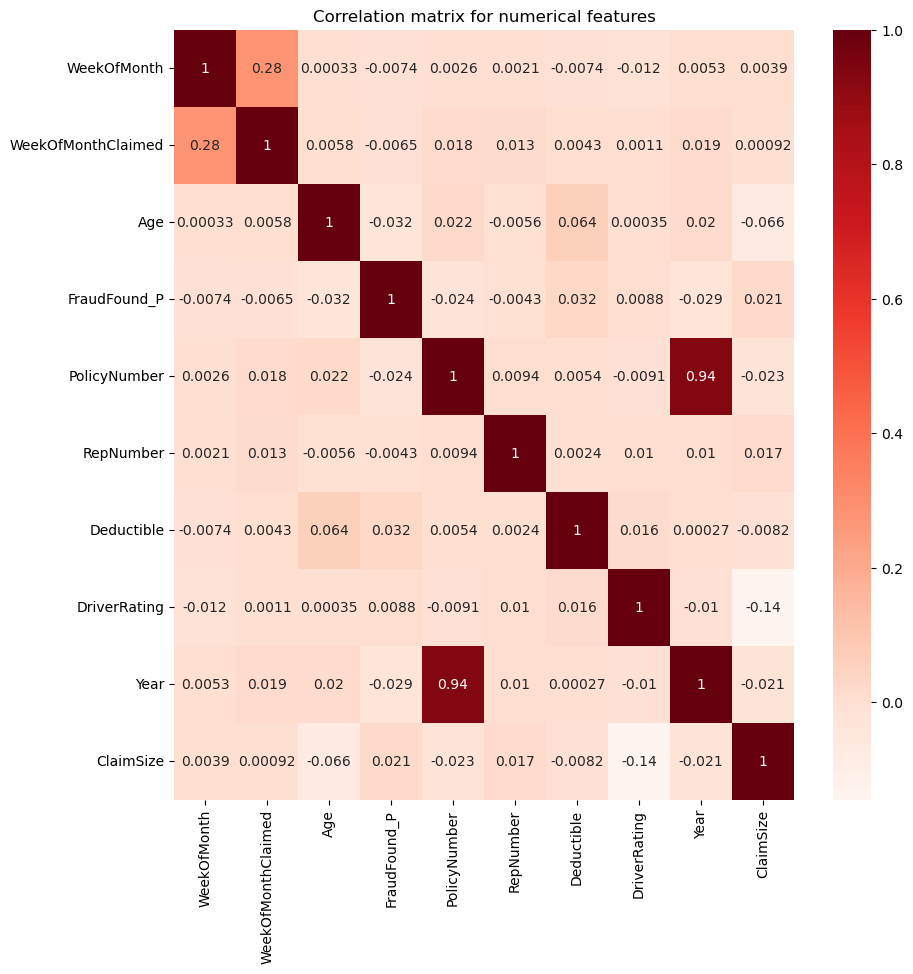

In [114]:
plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap = 'Reds')
plt.title('Correlation matrix for numerical features')

# Pre-Processing and Training Data Development

In [59]:
df_copy = df.copy()

In [60]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11565 entries, 0 to 11564
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month                 11565 non-null  object 
 1   WeekOfMonth           11565 non-null  int64  
 2   DayOfWeek             11565 non-null  object 
 3   Make                  11565 non-null  object 
 4   AccidentArea          11565 non-null  object 
 5   DayOfWeekClaimed      11565 non-null  object 
 6   MonthClaimed          11565 non-null  object 
 7   WeekOfMonthClaimed    11565 non-null  int64  
 8   Sex                   11565 non-null  object 
 9   MaritalStatus         11565 non-null  object 
 10  Age                   11560 non-null  float64
 11  Fault                 11565 non-null  object 
 12  PolicyType            11565 non-null  object 
 13  VehicleCategory       11565 non-null  object 
 14  VehiclePrice          11565 non-null  object 
 15  FraudFound_P       

In [61]:
months = {
    'Jan' : 1,
    'Feb' : 2,
    'Mar' : 3,
    'Apr' : 4,
    'May' : 5,
    'Jun' : 6,
    'Jul' : 7,
    'Aug' : 8,
    'Sep' : 9, 
    'Oct' : 10,
    'Nov' : 11,
    'Dec' : 12
          }
months_proc = lambda x: months.get(x, 0)

df_copy['Month'] = df_copy['Month'].apply(months_proc)
df_copy['MonthClaimed'] = df_copy['MonthClaimed'].apply(months_proc)

In [62]:
days_of_week = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
          }
days_of_week_proc = lambda x: days_of_week.get(x, 0)

df_copy['DayOfWeek'] = df_copy['DayOfWeek'].apply(days_of_week_proc)
df_copy['DayOfWeekClaimed'] = df_copy['DayOfWeekClaimed'].apply(days_of_week_proc)

In [51]:
vehicle_price = {
    'less than 20000': 1,
    '20000 to 29000' : 2,
    '30000 to 39000' : 3,
    '40000 to 59000' : 4,
    '60000 to 69000' : 5,
    'more than 69000': 6,
          }
vehicle_price_proc = lambda x: vehicle_price.get(x, 0)

df_copy['VehiclePrice'] = df_copy['VehiclePrice'].apply(vehicle_price_proc)

In [63]:
vehicle_age = {
    'new'         : 0.5,
    '2 years'     : 2,
    '3 years'     : 3,
    '4 years'     : 4,
    '5 years'     : 5,
    '6 years'     : 6,
    '7 years'     : 7,
    'more than 7' : 8.5,
          }
vehicle_age_proc = lambda x: vehicle_age[x]

df_copy['AgeOfVehicle'] = df_copy['AgeOfVehicle'].apply(vehicle_age_proc)

In [64]:
age_variants = {
    '16 to 17'     : 1,
    '18 to 20'     : 2,
    '21 to 25'     : 3,
    '26 to 30'     : 4,
    '31 to 35'     : 5,
    '36 to 40'     : 6,
    '41 to 50'     : 7,
    '51 to 65'     : 8,
    'over 65'      : 9,
          }
age_proc = lambda x: age_variants[x]

df_copy['AgeOfPolicyHolder'] = df_copy['AgeOfPolicyHolder'].apply(age_proc)

In [66]:
df_copy['Age'] = df_copy['Age'].fillna(0)
df_copy['DriverRating'] = df_copy['DriverRating'].fillna(0)

In [69]:
df_copy.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,12,5,3,Honda,Urban,2,1,1,Female,Single,21.0,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1.0,more than 30,more than 30,none,3.0,4,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,1,3,3,Honda,Urban,1,1,4,Male,Single,34.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4.0,more than 30,more than 30,none,6.0,5,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,10,5,5,Honda,Urban,4,11,2,Male,Married,47.0,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3.0,more than 30,more than 30,1,7.0,7,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,6,2,6,Toyota,Rural,5,7,1,Male,Married,65.0,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2.0,more than 30,more than 30,1,8.5,8,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,2,1,6,Honda,Urban,1,2,3,Male,Married,36.0,Third Party,Sport - Collision,Sport,more than 69000,0,7,14,400,1.0,more than 30,more than 30,1,7.0,6,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


In [70]:
def dummification(df):
    dummy_df = pd.DataFrame()
    object_cols = df.columns[df.dtypes == object]
    for col in object_cols:
        dummy_df = pd.concat([dummy_df, create_dummy(col, df)], axis = 1)
    
    df_out = pd.concat([df.drop(columns = object_cols), dummy_df], axis = 1)
    return df_out.sort_index(ascending=False, axis=1)
        

def create_dummy(col, df):
    df_dummy = pd.get_dummies(df[col], drop_first = True)
    df_dummy.columns = ['dum: ' + str(col) + ': ' + str(name) for name in df_dummy.columns]
    return df_dummy

df_copy = dummification(df_copy)
df_copy.head()

,dum: WitnessPresent: Yes,dum: VehiclePrice: more than 69000,dum: VehiclePrice: less than 20000,dum: VehiclePrice: 60000 to 69000,dum: VehiclePrice: 40000 to 59000,dum: VehiclePrice: 30000 to 39000,dum: VehicleCategory: Utility,dum: VehicleCategory: Sport,dum: Sex: Male,dum: PolicyType: Utility - Liability,dum: PolicyType: Utility - Collision,dum: PolicyType: Utility - All Perils,dum: PolicyType: Sport - Liability,dum: PolicyType: Sport - Collision,dum: PolicyType: Sport - All Perils,dum: PolicyType: Sedan - Liability,dum: PolicyType: Sedan - Collision,dum: PoliceReportFiled: Yes,dum: PastNumberOfClaims: none,dum: PastNumberOfClaims: more than 4,dum: PastNumberOfClaims: 2 to 4,dum: NumberOfSuppliments: none,dum: NumberOfSuppliments: more than 5,dum: NumberOfSuppliments: 3 to 5,dum: NumberOfCars: more than 8,dum: NumberOfCars: 5 to 8,dum: NumberOfCars: 3 to 4,dum: NumberOfCars: 2 vehicles,dum: MaritalStatus: Widow,dum: MaritalStatus: Single,dum: MaritalStatus: Married,dum: Make: VW,dum: Make: Toyota,dum: Make: Saturn,dum: Make: Saab,dum: Make: Porche,dum: Make: Pontiac,dum: Make: Nisson,dum: Make: Mercury,dum: Make: Mecedes,dum: Make: Mazda,dum: Make: Lexus,dum: Make: Jaguar,dum: Make: Honda,dum: Make: Ford,dum: Make: Ferrari,dum: Make: Dodge,dum: Make: Chevrolet,dum: Make: BMW,dum: Fault: Third Party,dum: Days_Policy_Claim: none,dum: Days_Policy_Claim: more than 30,dum: Days_Policy_Claim: 8 to 15,dum: Days_Policy_Accident: none,dum: Days_Policy_Accident: more than 30,dum: Days_Policy_Accident: 8 to 15,dum: Days_Policy_Accident: 15 to 30,dum: BasePolicy: Liability,dum: BasePolicy: Collision,dum: AgentType: Internal,dum: AddressChange_Claim: under 6 months,dum: AddressChange_Claim: no change,dum: AddressChange_Claim: 4 to 8 years,dum: AddressChange_Claim: 2 to 3 years,dum: AccidentArea: Urban,Year,WeekOfMonthClaimed,WeekOfMonth,RepNumber,PolicyNumber,MonthClaimed,Month,FraudFound_P,DriverRating,Deductible,DayOfWeekClaimed,DayOfWeek,ClaimSize,AgeOfVehicle,AgeOfPolicyHolder,Age
0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1994,1,5,12,1,1,12,0,1.0,300,2,3,55526.069421,3.0,4,21.0
1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1994,4,3,15,2,1,1,0,4.0,400,1,3,59294.455571,6.0,5,34.0
2,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1994,2,5,7,3,11,10,0,3.0,400,4,5,71756.941320,7.0,7,47.0
3,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1994,1,2,4,4,7,6,0,2.0,400,5,6,7584.153493,8.5,8,65.0
4,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1994,3,1,14,7,2,2,0,1.0,400,1,6,98545.374339,7.0,6,36.0
